# Project of sale analysis

## Code base

In [3]:
# Libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Set random seed for reproducibility
np.random.seed(42)

# Create a date range for 12 months (365 days)
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Create a dictionary with sample data
data = {
    'Date': date_range,
    'Product': np.random.choice(['A','B','C','D'], size=len(date_range)),
    'Sales': np.random.randint(100, 1000, size = len(date_range)),
    'Revenue': np.random.uniform(1000, 5000, size=len(date_range))
}

# Create a pandas DataFrame with the generated data
df = pd.DataFrame(data)

# Display the DataFrame
df

,Date,Product,Sales,Revenue
0,2023-01-01,C,514,3247.466769
1,2023-01-02,D,397,1954.387439
2,2023-01-03,A,710,3719.379120
3,2023-01-04,C,362,3959.635042
4,2023-01-05,C,863,1952.944610
...,...,...,...,...
360,2023-12-27,D,647,4514.516461
361,2023-12-28,A,195,2981.694506
362,2023-12-29,A,763,3965.843645
363,2023-12-30,B,762,3292.603397


## Exploratory Data Analysis (EDA)

### a) Descriptive analysis

                      Date       Sales      Revenue
count                  365  365.000000   365.000000
mean   2023-07-02 00:00:00  561.405479  3045.354597
min    2023-01-01 00:00:00  101.000000  1010.380098
25%    2023-04-02 00:00:00  319.000000  2083.830570
50%    2023-07-02 00:00:00  573.000000  3125.063016
75%    2023-10-01 00:00:00  788.000000  3965.843645
max    2023-12-31 00:00:00  997.000000  4990.770464
std                    NaN  269.951481  1128.790493
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     365 non-null    datetime64[ns]
 1   Product  365 non-null    object        
 2   Sales    365 non-null    int32         
 3   Revenue  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 10.1+ KB
None

Unique values in Date:
Date
2023-01-01    1
2023-09-09    1
2023-09-07

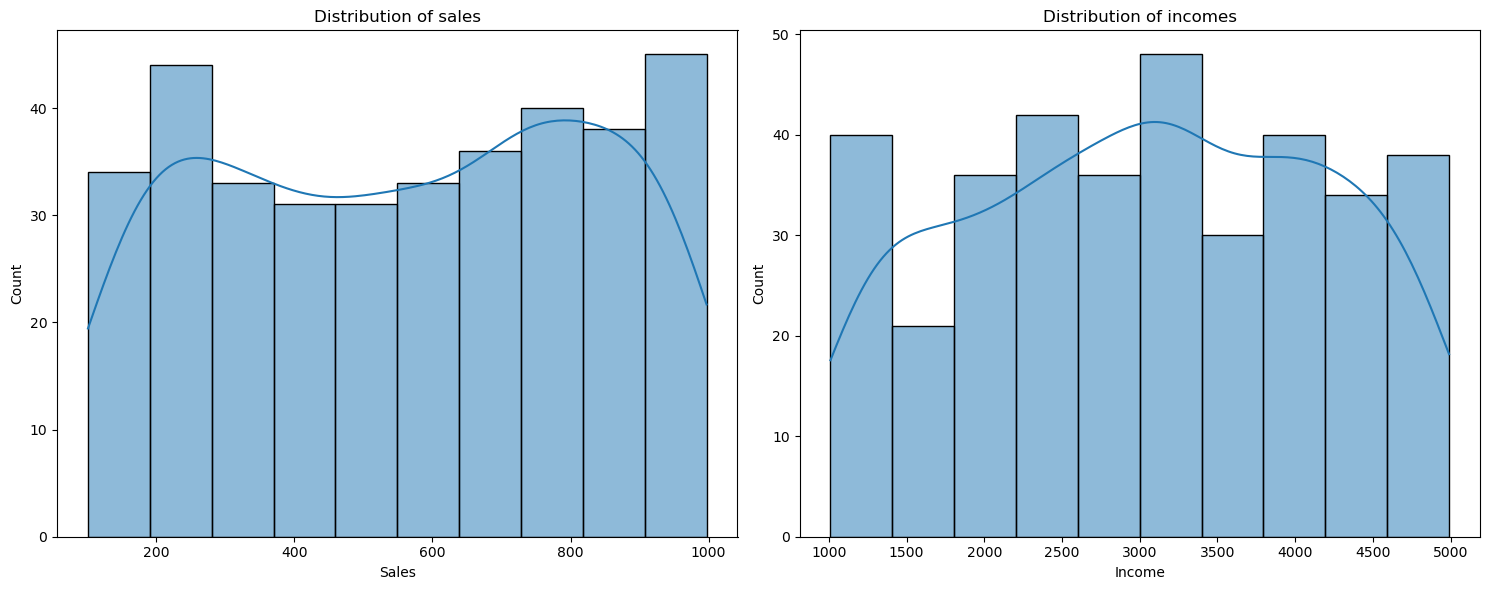

In [6]:
# Descriptive statistics
print(df.describe()) #Provide summary statistics of the DataFrame

# Information about the kind of data and unique data
print(df.info())

# Counting for unique values per column
for column in df.columns:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())

# Distribution of sales and income
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sns.histplot(df['Sales'], kde=True, ax=ax1)
ax1.set_title('Distribution of sales')
ax1.set_xlabel('Sales')
              
sns.histplot(df['Revenue'], kde=True, ax=ax2)
ax2.set_title('Distribution of incomes')
ax2.set_xlabel('Income')
             
plt.tight_layout()
plt.show()

### b) Variable type settings

In [8]:
# Verify present variable types
print(df.dtypes)

#Get sure about "Date" it's a float type
df['Date'] = pd.to_datetime(df['Date'])

#Get sure about "Product" it's a category type
df['Product'] = df['Product'].astype('category')

#Get sure about "Sales" it's a integer type
df['Sales'] = df['Sales'].astype(int)

#Get sure about "Date" it's a float type
df['Revenue'] = df['Revenue'].astype(float)

# Verify the new data types
print(df.dtypes)

Date       datetime64[ns]
Product            object
Sales               int32
Revenue           float64
dtype: object
Date       datetime64[ns]
Product          category
Sales               int32
Revenue           float64
dtype: object


### c) Detection and processing of missing data

Date       0
Product    0
Sales      0
Revenue    0
dtype: int64


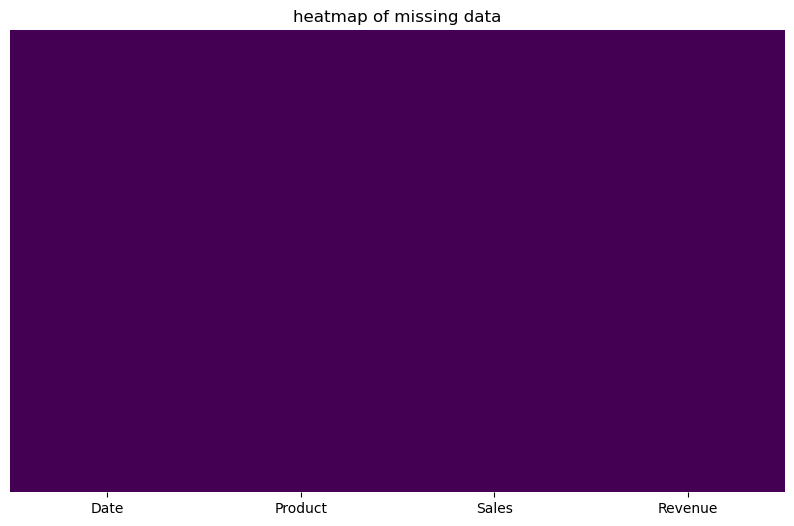

In [10]:
# Verify missing data
print(df.isnull().sum())

# Visualizar datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('heatmap of missing data')
plt.show()

# if there is missing data, you could try it that: 
# df = df.dropna()  # Delete row with missing data
# or
# df = df.fillna(method='ffill')  # Fill in with the previous data

### d) Identification of atypical data

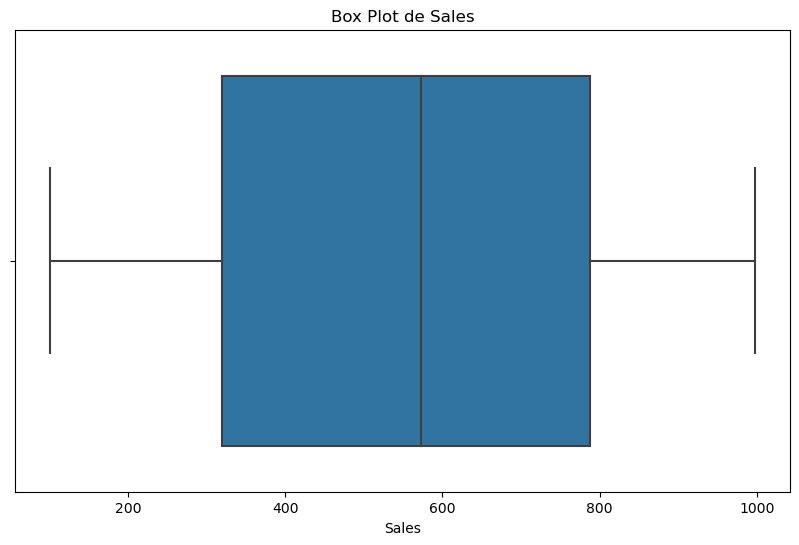

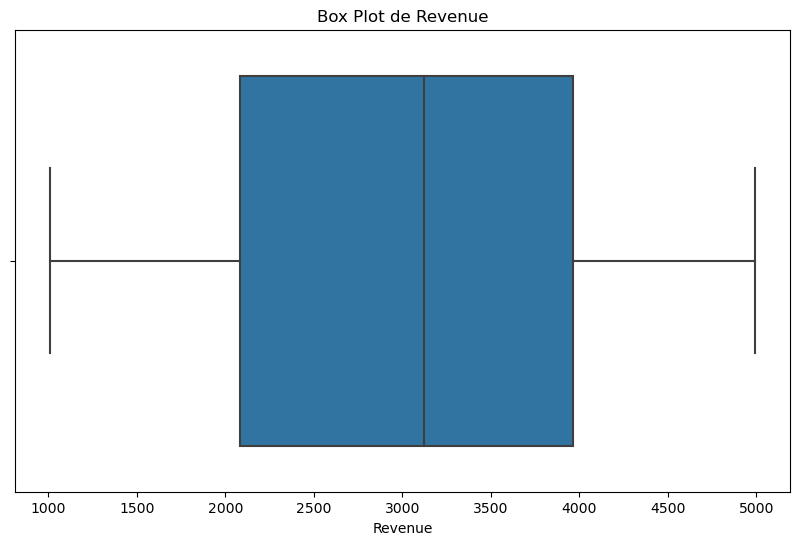

Outliers of Sales:
Empty DataFrame
Columns: [Date, Product, Sales]
Index: []

Outliers in incomes
Empty DataFrame
Columns: [Date, Product, Revenue]
Index: []


In [12]:
# Función para crear un diagrama de caja
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot de {column}')
    plt.show()

# Create box plots for 'Sales' and 'Revenue'
plot_boxplot(df, 'Sales')
plot_boxplot(df, 'Revenue')

# Identify outliers using IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

sales_outliers = identify_outliers(df, 'Sales')
revenue_outliers = identify_outliers(df, 'Revenue')

print("Outliers of Sales:")
print(sales_outliers[['Date', 'Product', 'Sales']])

print("\nOutliers in incomes")
print(revenue_outliers[['Date', 'Product', 'Revenue']])

## Data visualization

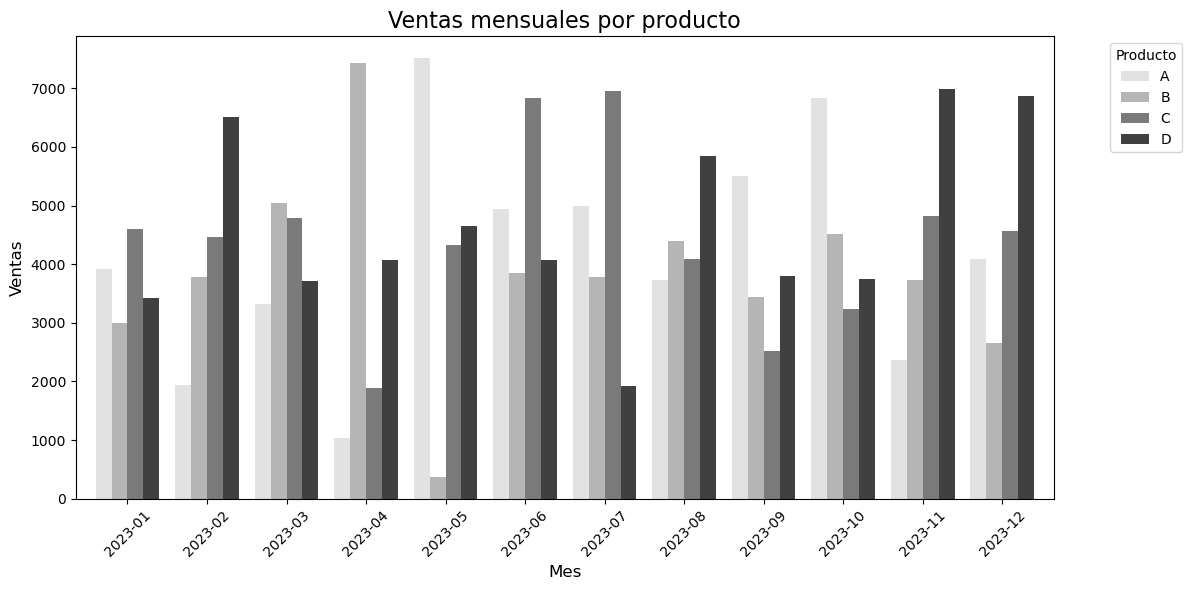

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby(['Month', 'Product'])['Sales'].sum().unstack()

# Create a gray palette
num_products = len(monthly_sales.columns)
grays = plt.colormaps['Greys'](np.linspace(0.2, 0.8, num_products))

# Create the graph
fig, ax = plt.subplots(figsize=(12, 6))
monthly_sales.plot(kind='bar', ax=ax, width=0.8, color=grays)

# Customize the graph
plt.title('Ventas mensuales por producto', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

# Show graph
plt.show()

## Temporal analysis

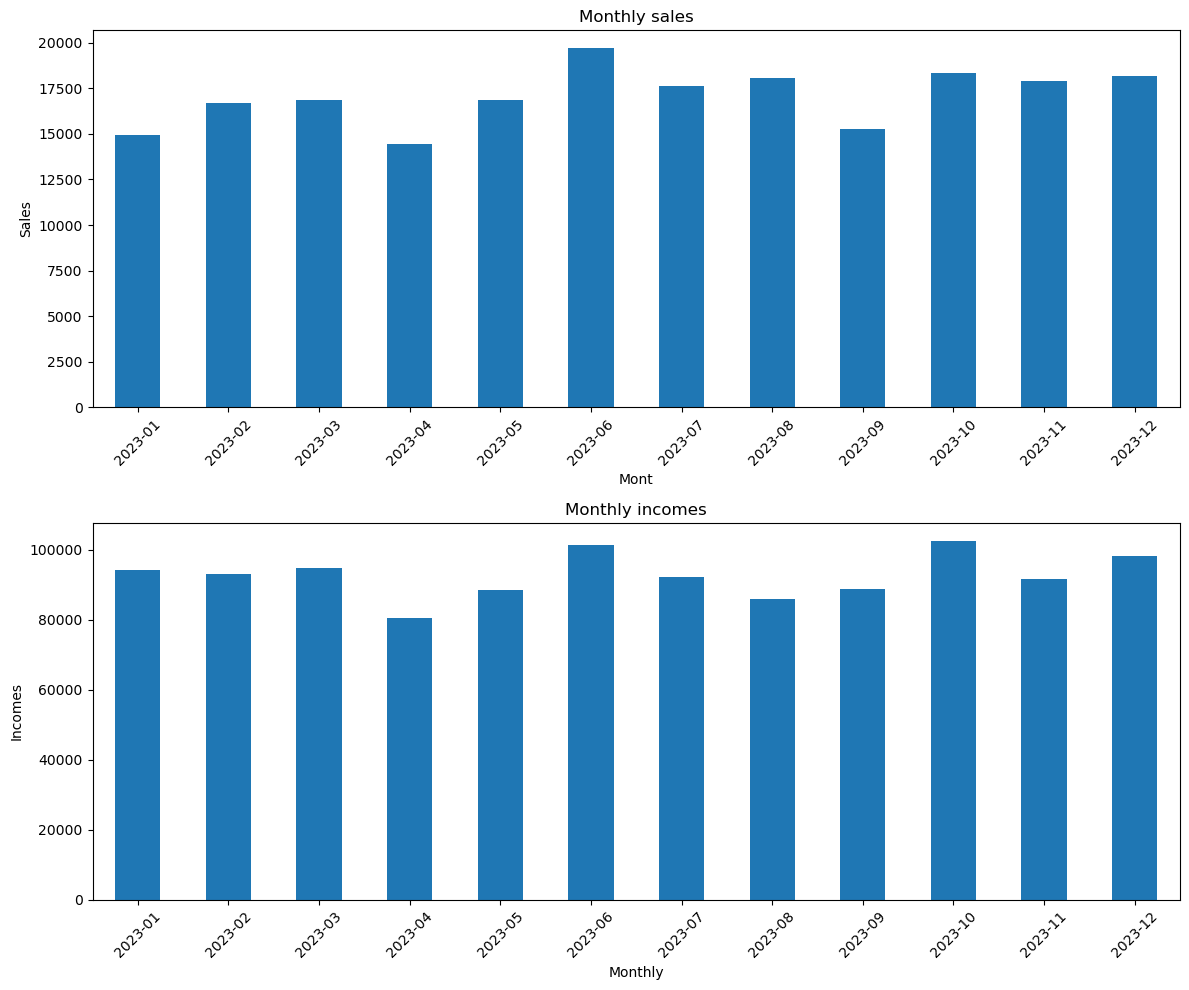

In [16]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_revenue = df.groupby('Month')['Revenue'].sum()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

monthly_sales.plot(kind='bar', ax=ax1)
ax1.set_title('Monthly sales')
ax1.set_xlabel('Mont')
ax1.set_ylabel('Sales')
ax1.tick_params(axis='x', rotation=45)

monthly_revenue.plot(kind='bar', ax=ax2)
ax2.set_title('Monthly incomes')
ax2.set_xlabel('Monthly')
ax2.set_ylabel('Incomes')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Product analysis

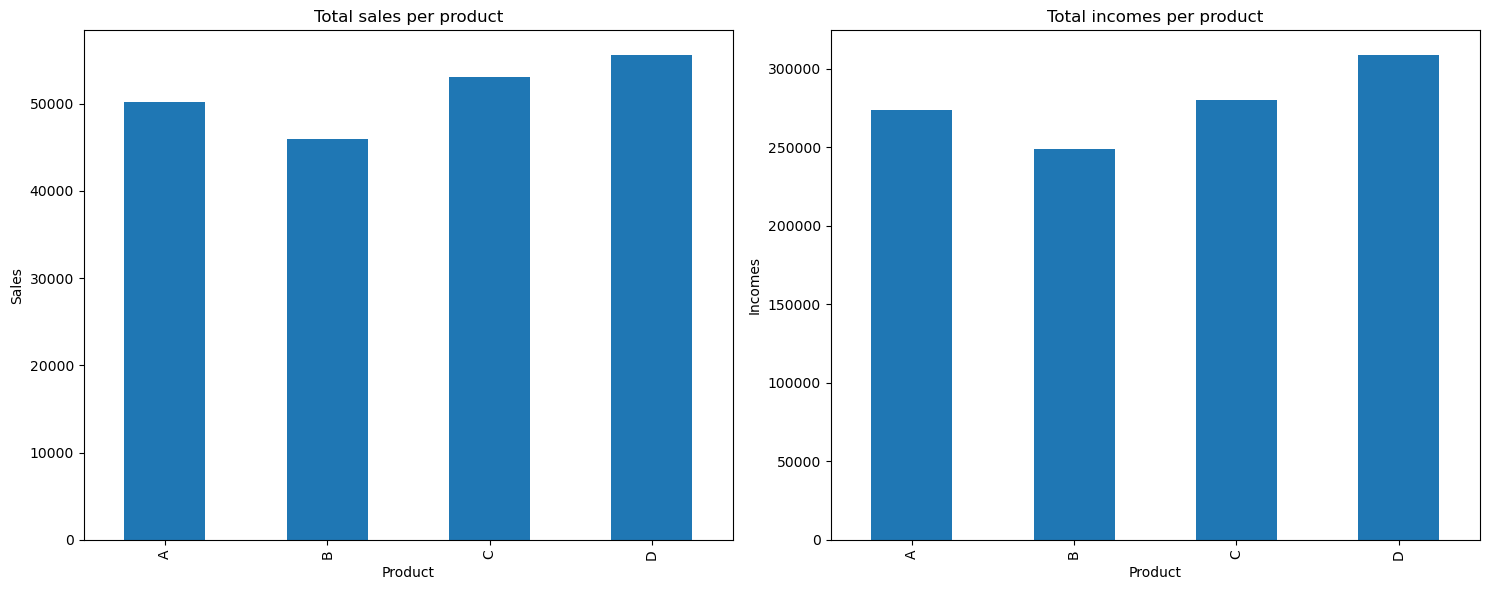

In [29]:
product_sales = df.groupby('Product')['Sales'].sum()
product_revenue = df.groupby('Product')['Revenue'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

product_sales.plot(kind='bar', ax=ax1)
ax1.set_title('Total sales per product')
ax1.set_xlabel('Product')
ax1.set_ylabel('Sales')

product_revenue.plot(kind='bar', ax=ax2)
ax2.set_title('Total incomes per product')
ax2.set_xlabel('Product')
ax2.set_ylabel('Incomes')

plt.tight_layout()
plt.show()